In [1]:
"""
Demonstrate optimising function of two variables.
Show path of optimisation steps on a graph.

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=[[5,4],[4,5]]
    return (x-c).T@A@(x-c)

# Wiggly function
def f_wiggly(x):
    return np.log(1+(x[0]-0.5)**2 + 2*(x[1]-0.5-0.25*np.sin(15*(x[0]-0.5)))**2)

# Display contour plot of f at all points (x[i],y[j])
def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)
print("Define functions.")

Define functions.


Number of iterations:  3
Result: ( 0.75 , 0.5000000000000003 )


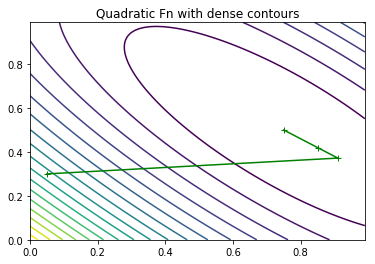

In [2]:
# =============== Main code of Powell ============================
x0=np.array([0.05,0.3])
pt_list=[x0]

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False
    
test_fn=f_quad
fn_name="Quadratic Fn"

res=minimize(test_fn,x0,method='Powell',callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,test_fn,20)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  

    
plt.title(fn_name+" with dense contours")
plt.show()

Number of iterations:  73
Result: ( 0.5007608233265949 , 0.5043139398692177 )


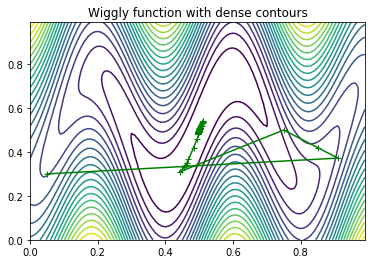

In [3]:
test_fn=f_wiggly
fn_name="Wiggly function"

res=minimize(test_fn,x0,method='Powell',callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,test_fn,20)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  

    
plt.title(fn_name+" with dense contours")
plt.show()

Number of iterations:  50
Result: ( 0.7499794975470762 , 0.5000326539118198 )


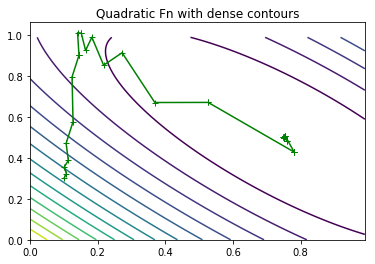

In [10]:
# =============== Main code Nelder-Mead============================
x0=np.array([0.1,0.3])
pt_list=[x0]

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

fn=f_quad
fn_name="Quadratic Fn"

res=minimize(fn,x0,method='Nelder-Mead',callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,fn,15)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
    
plt.title(fn_name+" with dense contours")
plt.show()

Number of iterations:  65
Result: ( 0.49999389355157864 , 0.49998900918225914 )


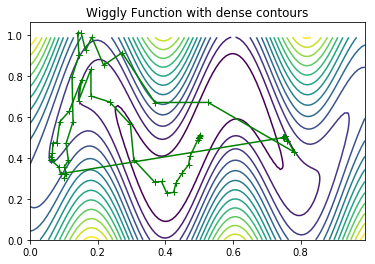

In [11]:
fn=f_wiggly
fn_name="Wiggly Function"

res=minimize(fn,x0,method='Nelder-Mead',callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,fn,15)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
    
plt.title(fn_name+" with dense contours")
plt.show()

In [6]:
# Return gradient of f_quad at x
def f_quad_grad(x):
    c=np.array([0.75,0.5])
    A=np.array([[5,4],[4,5]])
    r= 2*A@(x-c)
    return r

def steepest_descent(f,grad_f,x0,alpha,g_tol,max_its):
    """Perform gradient descent from x0 until gradient below g_tol
       Assumes grad_f(x) returns gradient of f(x) at x
    """
    grad_mag=10
    n_its=0;
    x=x0
    pt_list=[x0]
    while ((grad_mag>g_tol) & (n_its<max_its)):
        g=grad_f(x)
        grad_mag=np.sqrt((g*g).sum())
        x=x-alpha*g
        pt_list.append(x)
        n_its=n_its+1
        
    return pt_list

x-grad:  -8.094999999999963
y-grad:  -7.19499999999984
grad_fn:  [-8.1 -7.2]
Result: ( 0.7460427120137126 , 0.5039572879862874 )


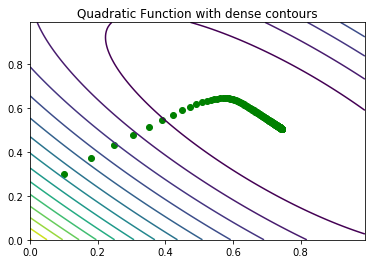

In [7]:
# =============== Main code SteepestDescent============================
# Test the gradient
d=0.001
f0=f_quad(x0)
f1=f_quad(x0+[d,0])
f2=f_quad(x0+[0,d])
print("x-grad: ",(f1-f0)/d)
print("y-grad: ",(f2-f0)/d)
print("grad_fn: ",f_quad_grad(x0))

alpha=0.01     # Scale for step 
g_tol=0.001   # Stop when gradient smaller than this
max_its=200   # Run no more than this number of iterations
pt_list=steepest_descent(f_quad,f_quad_grad,x0,alpha,g_tol,max_its)

fn_name="Quadratic Function"

#print("Number of iterations: ",pt_list.size())
# Result stored in last element of pt_list
print("Result: (",pt_list[-1][0],",",pt_list[-1][1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,f_quad,15)

# Plot the path of the optimisation
r=np.array(pt_list) # Convert list to array
plt.scatter(r[:,0],r[:,1],color="green")  
plt.title(fn_name+" with dense contours")
plt.show()



x-grad:  -8.59500000000013
y-grad:  -7.594999999999352
grad_fn:  [-8.6 -7.6]
Number of iterations:  2
Result: ( 0.75 , 0.5 )


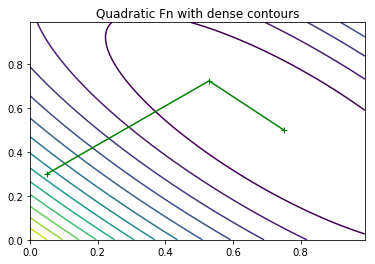

In [9]:
# =============== Main code using Gradient ============================
x0=np.array([0.05,0.3])
pt_list=[x0]

# Test the gradient
d=0.001
f0=f_quad(x0)
f1=f_quad(x0+[d,0])
f2=f_quad(x0+[0,d])
print("x-grad: ",(f1-f0)/d)
print("y-grad: ",(f2-f0)/d)
print("grad_fn: ",f_quad_grad(x0))

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

#test_fn=f_wiggly
#fn_name="Wiggly function"
    
test_fn=f_quad
test_fn_grad=f_quad_grad
fn_name="Quadratic Fn"

res=minimize(test_fn,x0,method='CG',jac=test_fn_grad,callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,test_fn,15)

for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
# Plot the path of the optimisation
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
plt.title(fn_name+" with dense contours")
plt.show()
